Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.6347 - accuracy: 0.4100 - val_loss: 1.3486 - val_accuracy: 0.5152
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2231 - accuracy: 0.5630 - val_loss: 1.1744 - val_accuracy: 0.5802
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0791 - accuracy: 0.6194 - val_loss: 1.0516 - val_accuracy: 0.6278
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9801 - accuracy: 0.6568 - val_loss: 0.9738 - val_accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9098 - accuracy: 0.6819 - val_loss: 0.9501 - val_accuracy: 0.6677
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8519 - accuracy: 0.7019 - val_loss: 0.9335 - val_accuracy: 0.6768
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8065 - accuracy: 0.7183 - val_loss: 0.9250 -

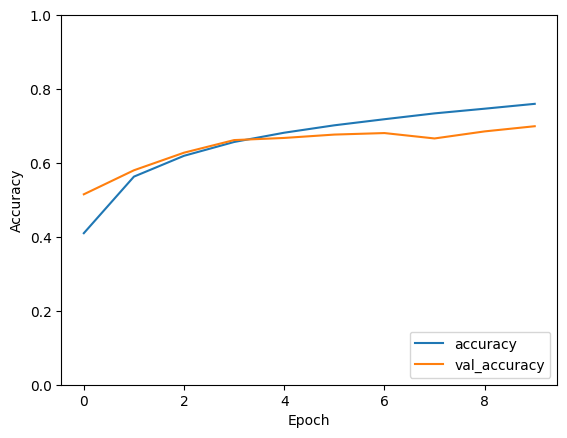

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
